RandomWalk Data Science Assessment

- Krishna Varshita Borra
- SRM University, AP

Question1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [107]:
import warnings

warnings.filterwarnings('ignore')

In [108]:
file_path="dataset.csv"

In [109]:
data = pd.read_csv(file_path)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [111]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


In [112]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [113]:
data.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [114]:
data.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [115]:
if 'sex' in data.columns:
    data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [116]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [117]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [118]:
gentoo_penguins = data[data['species'] == 'Gentoo']

1. isnull().sum() provides the count of missing values in each column.

2. To handle missing data for numerical data we replace the missing values with column meean to preserve the overall data distribution.

3. For categorical data we replace the missing values with the mode to maintain consistency


Question 2:
What is the average body_mass_g for Gentoo penguins? (code)

In [119]:
avg_bodymass=gentoo_penguins['body_mass_g'].mean()

In [120]:
avg_bodymass

5126.806262969251

Question 3:
    How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [121]:
species_groups = data.groupby('species')

skewness_results = {}
kurtosis_results = {}

for species, group in species_groups:
    skewness_results[species] = {
        'bill_length_mm': skew(group['bill_length_mm']),
        'bill_depth_mm': skew(group['bill_depth_mm']),
    }
    kurtosis_results[species] = {
        'bill_length_mm': kurtosis(group['bill_length_mm']),
        'bill_depth_mm': kurtosis(group['bill_depth_mm']),
    }


In [122]:
pd.DataFrame(skewness_results).T

,bill_length_mm,bill_depth_mm
Adelie,0.162533,0.329209
Chinstrap,-0.095936,0.006726
Gentoo,0.712323,0.334623


In [123]:
pd.DataFrame(kurtosis_results).T

,bill_length_mm,bill_depth_mm
Adelie,-0.228104,-0.101072
Chinstrap,-0.124011,-0.898740
Gentoo,1.147647,-0.611126


Text(0.5, 0, 'Bill Length (mm)')

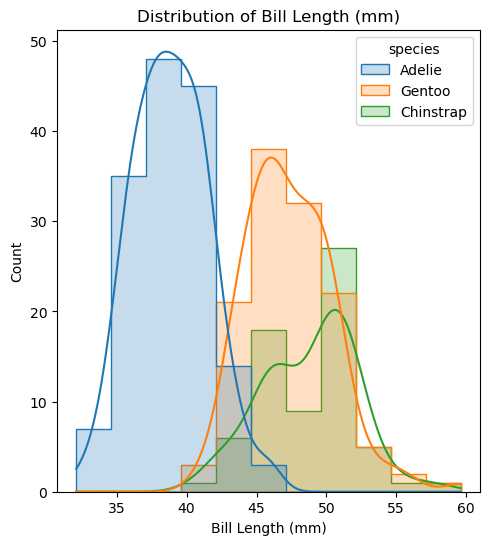

In [124]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='bill_length_mm', hue='species', kde=True, element='step')
plt.title('Distribution of Bill Length (mm)')
plt.xlabel('Bill Length (mm)')

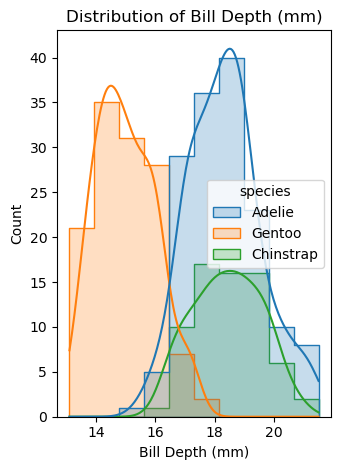

In [125]:
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='bill_depth_mm', hue='species', kde=True, element='step')
plt.title('Distribution of Bill Depth (mm)')
plt.xlabel('Bill Depth (mm)')

plt.tight_layout()
plt.show()

1. Calculating Skewness and Kurtosis:

    Skewness: Measures the asymmetry of a distribution. A value near 0 indicates symmetry, Positive values indicate a right-skewed distribution and negative values indicate a left-skewed distribution.

    Kurtosis: Measures the "tailedness" of a distribution. A value near 0 (excess kurtosis) indicates a normal tail, Positive values indicate heavy tails (outliers) and negative values indicate light tails.

2.  seaborn.histplot() function visualizes distributions with kernel density estimates (kde) for better comparison.
    Separate plots for bill_length_mm and bill_depth_mm help observe differences between species.

Question 4:
     Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

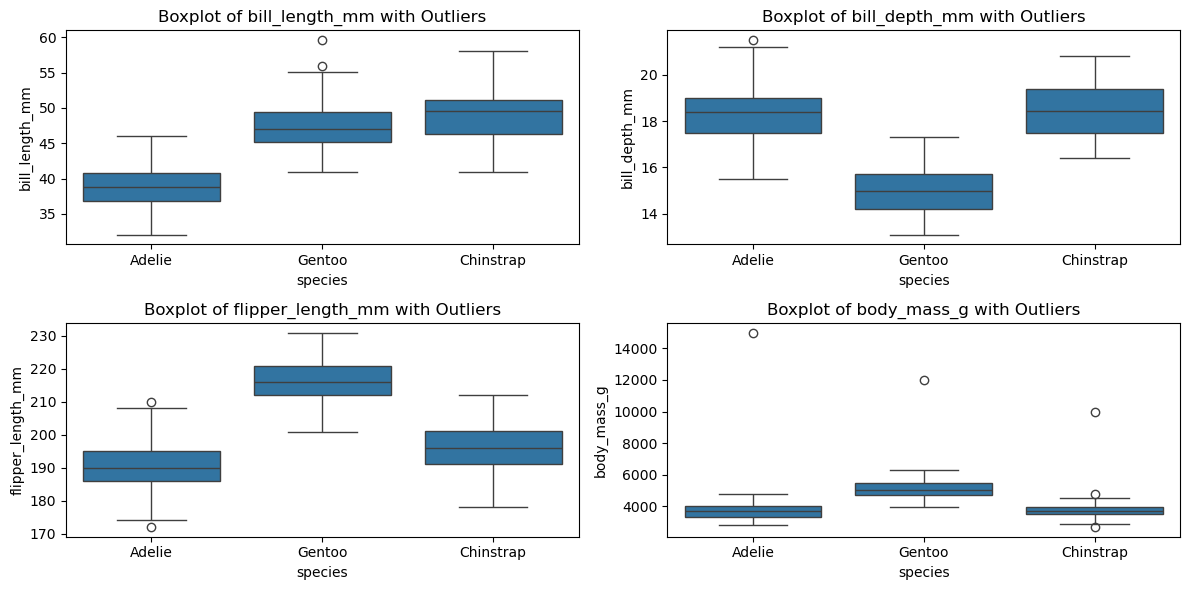

In [126]:
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

outliers_dict = {}

for col in numerical_columns:
    outliers_dict[col] = detect_outliers_iqr(data, col)


plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x='species', y=col)
    plt.title(f"Boxplot of {col} with Outliers")

plt.tight_layout()
plt.show()


In [127]:
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers[['species', col]])
    print("\n")

Outliers in bill_length_mm:
Empty DataFrame
Columns: [species, bill_length_mm]
Index: []


Outliers in bill_depth_mm:
Empty DataFrame
Columns: [species, bill_depth_mm]
Index: []


Outliers in flipper_length_mm:
Empty DataFrame
Columns: [species, flipper_length_mm]
Index: []


Outliers in body_mass_g:
       species  body_mass_g
73      Adelie      15000.0
206     Gentoo      12000.0
324  Chinstrap      10000.0




1. Detecting outliers
    
    we calculate first and third quartiles for each numerical features.
    The function detect_outliers_iqr filters the data to identify the outliers for each feature.
    
    A boxplot is generated for each feature to visually represent the distribution and outliers. Outliers appear as individual points outside the whiskers.
    For each feature, the code prints the rows where outliers were detected, showing the species and feature values for review.
    
    The boxplots will show the distribution of each feature across the three species.

Question 5:
     Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [129]:
data_clean = data.copy()
data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
data_clean = data_clean.dropna()

In [130]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [131]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])


In [132]:
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data)

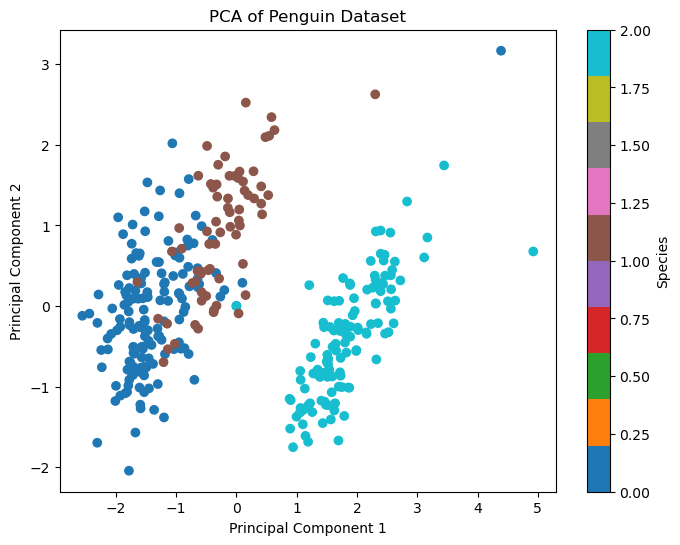

In [133]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("husl", len(data_clean['species'].unique()))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data_clean['species'].astype('category').cat.codes, cmap='tab10')
plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

In [134]:
print(pca.explained_variance_ratio_)

[0.6170052  0.19742404]


1. Handling missing values
    The fillna(data_clean.mean()) method replaces any missing values with mean of respective column.
2. Handle Infinite Values
    we replace them with NAN and then drop the rows that contain NAN
3. Standardization
    The data is standardized using StandardScaler
4. After cleaning the data, PCA is applied to reduce the features to two principal components, and the data is visualized.
5. Scatter Plot: Shows the data projected onto the first two principal components.
6. Prints the proportion of variance explained by each principal component.

Question 6:
    Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

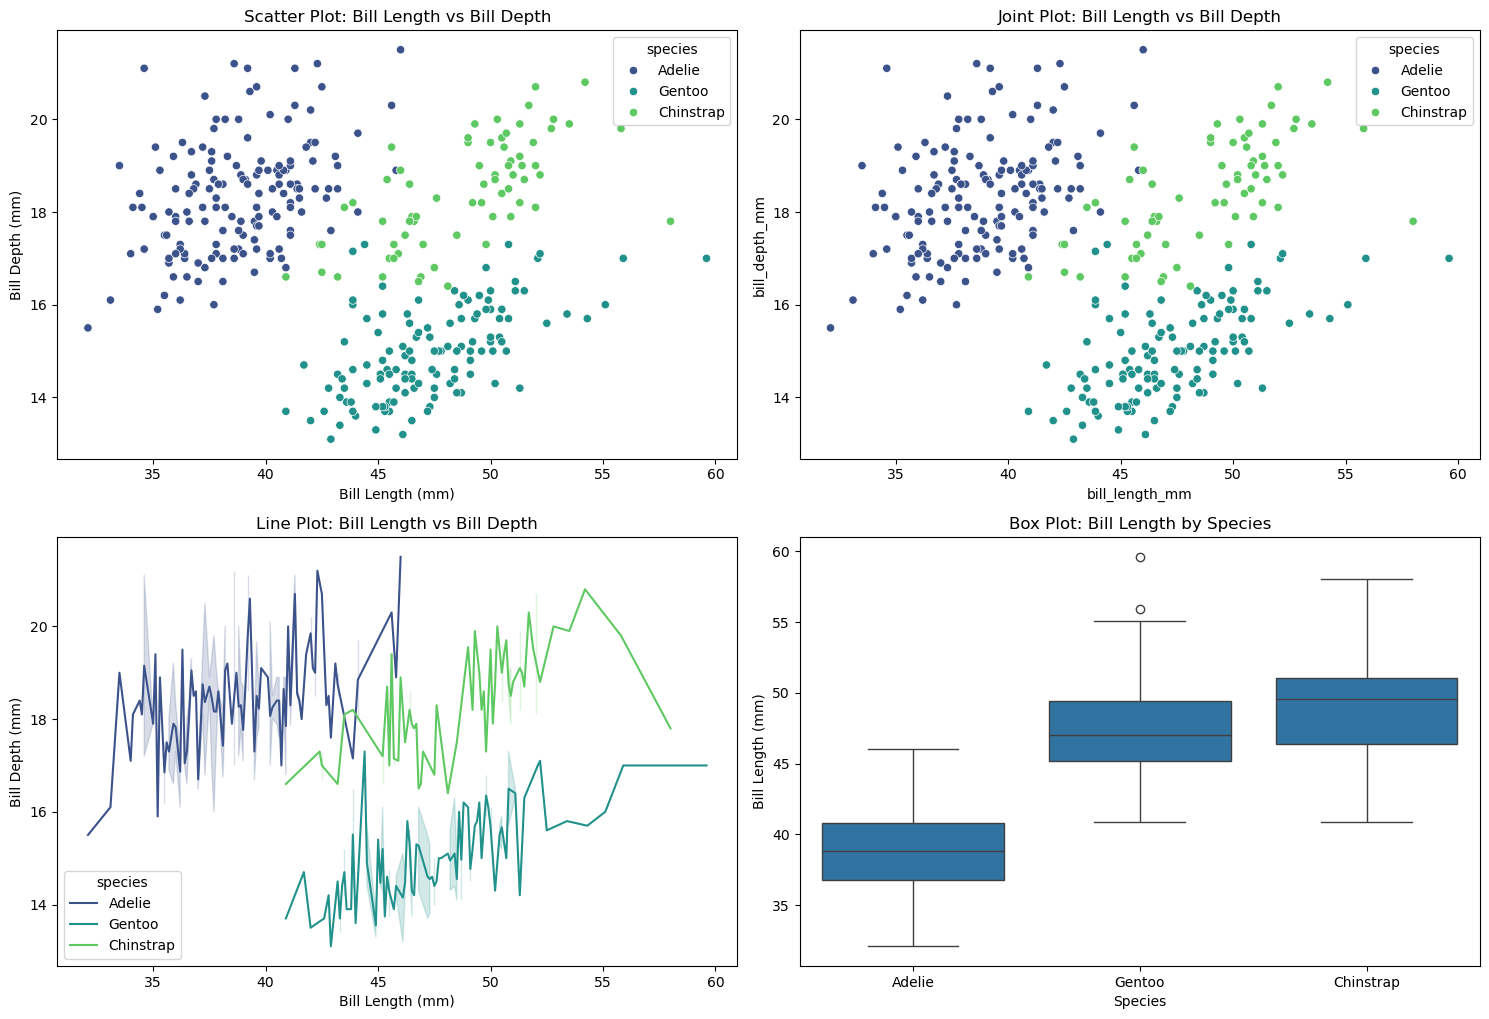

In [135]:
plt.figure(figsize=(15, 20))

# Scatter plot
plt.subplot(4, 2, 1)
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='viridis')
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Joint Plot (Scatter + Histogram)
plt.subplot(4, 2, 2)
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='viridis')
plt.title('Joint Plot: Bill Length vs Bill Depth')

# Line Plot
plt.subplot(4, 2, 3)
sns.lineplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='viridis')
plt.title('Line Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Box Plot
plt.subplot(4, 2, 4)
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title('Box Plot: Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Pair Plot: Bill Length and Bill Depth')

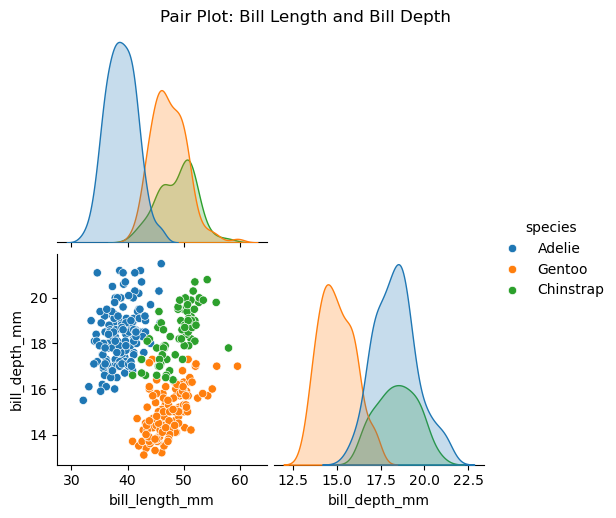

In [136]:
#Pair Plot (only for relevant features)
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm'], hue='species', corner=True, height=2.5)
plt.suptitle('Pair Plot: Bill Length and Bill Depth', y=1.02)

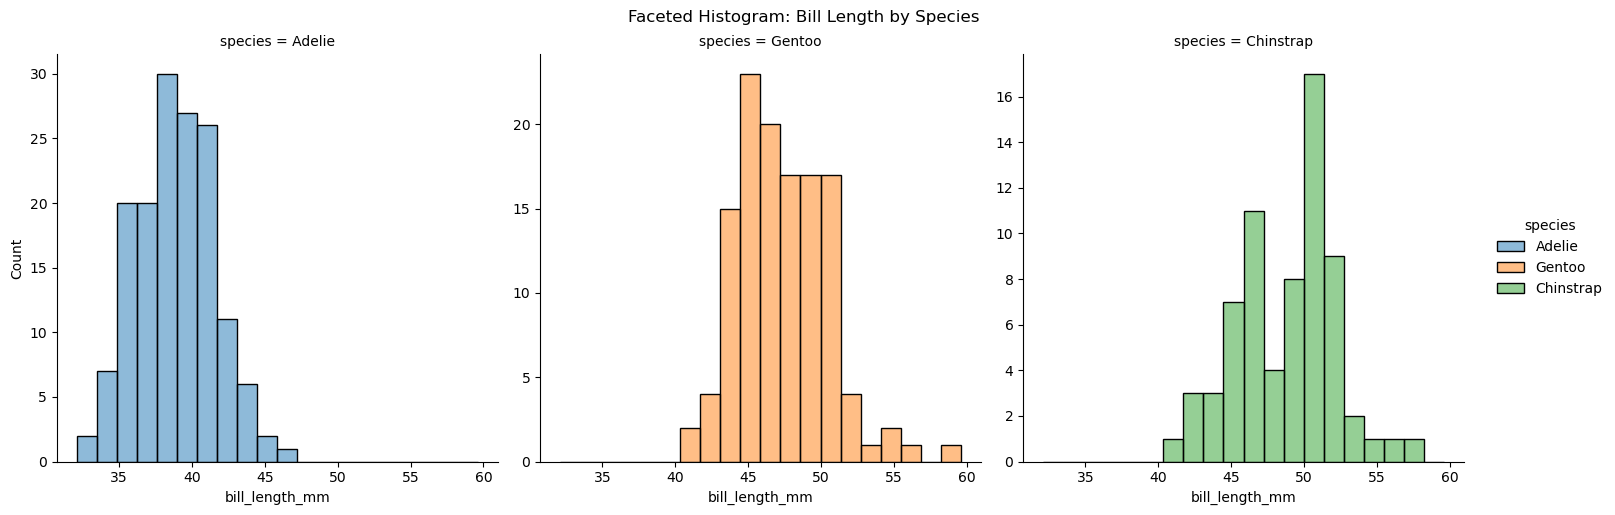

In [137]:
sns.displot(
    data=data, 
    x='bill_length_mm', 
    hue='species', 
    kind='hist', 
    bins=20, 
    col='species',
    facet_kws={'sharey': False, 'sharex': True}
)
plt.suptitle('Faceted Histogram: Bill Length by Species', y=1.02)
plt.show()

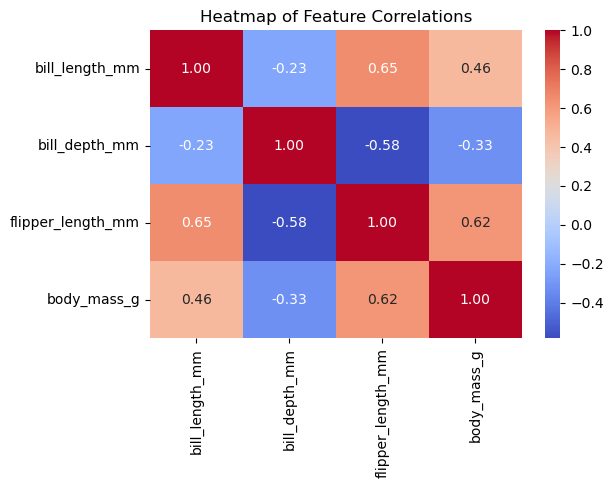

In [138]:
# Heatmap of Correlations
plt.figure(figsize=(6, 4))
correlation_matrix = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()


Question 7:
    Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [139]:
max_flipper_by_group = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

In [140]:
max_flipper_by_island = max_flipper_by_group.loc[max_flipper_by_group.groupby('island')['flipper_length_mm'].idxmax()]

In [141]:
max_flipper_by_group

,species,island,flipper_length_mm
0,Adelie,Biscoe,203.0
1,Adelie,Dream,208.0
2,Adelie,Torgersen,210.0
3,Chinstrap,Dream,212.0
4,Gentoo,Biscoe,231.0


In [142]:
max_flipper_by_island

,species,island,flipper_length_mm
4,Gentoo,Biscoe,231.0
3,Chinstrap,Dream,212.0
2,Adelie,Torgersen,210.0


Question 8:
    Perform z-score normalization on this dataset. (code)

In [ ]:
from scipy.stats import zscore
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

normalized_data = data.copy()  
normalized_data[numerical_columns] = normalized_data[numerical_columns].apply(zscore)
normalized_data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.882230,0.787743,-1.422488,-0.470213,male
1,Adelie,Torgersen,-0.808355,0.126556,-1.065352,-0.425343,female
2,Adelie,Torgersen,-0.660604,0.431719,-0.422507,-0.918910,female
3,Adelie,Torgersen,0.000000,0.000000,0.000000,0.000000,male
4,Adelie,Torgersen,-1.325483,1.092905,-0.565361,-0.739431,female
